In [4]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy import stats

import pandas as pd
import seaborn as sns

In [5]:
def meanFunc(x,k,l):
    mean=1/(1+np.exp((k-x)/l))   
    
    return mean


In [6]:
#y = np.array([0.25, 0.2365622342, 0.15630337, 0.6584035078, 0.9819810819, 1.0 ])
y=np.array([0.05177616731, 0.03480182783, 0.2586919538, 0.1515861299, 0.07619554416, 0.3648592109, 0.1656506177, 0.1326232391, 0.1560480621, 0.1764880455, 0.08428899242, 0.3692762368, 0.7342451965, 0.4375273115])
x=np.arange(1,len(y)+1)

In [7]:
popt, pcov = curve_fit(meanFunc, x, y)

In [8]:
popt

array([14.53268856,  4.86411842])

In [9]:
yModel=(meanFunc(x,*popt))

In [10]:
def squared_exponential_kernel(x1, x2, sigma_f=1.0, l=1.0):
    """
    Squared-exponential kernel function.
    
    :param x1: array-like of shape (n_samples_X, n_features)
    :param x2: array-like of shape (n_samples_Y, n_features)
    :param sigma_f: float, default=1.0
        Signal variance.
    :param l: float or array-like of shape (n_features,), default=1.0
        Length scale(s).
    :return: ndarray of shape (n_samples_X, n_samples_Y)
        Kernel k(X, Y).
    """
    sqdist = np.sum(x1**2, 1).reshape(-1, 1) + np.sum(x2**2, 1) - 2 * np.dot(x1, x2.T)
    return sigma_f**2 * np.exp(-0.5*sqdist / l**2 )

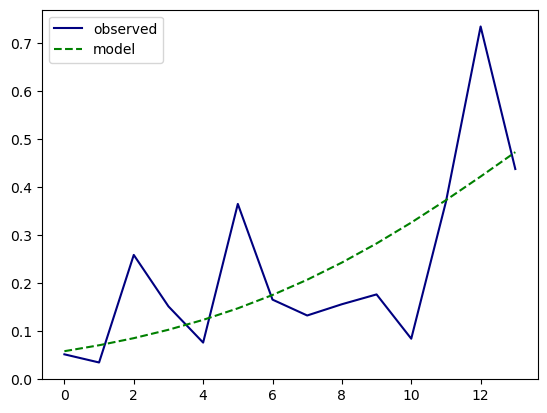

In [11]:
plt.plot(y,c='navy',label='observed')
plt.plot(yModel,'g--',label='model')
plt.legend();


def multivariateNormal(x,k,l,L,sigma_f):
    x1=y
    x2=y
    mean=1/(1+np.exp((round(k)-x)/l))
    x1_sq = np.sum(x1**2) 
    x2_sq = np.sum(x2**2) 
    sqdist = x1_sq + x2_sq - 2 * np.dot(x1.T, x2)
    cov=sigma_f**2 * np.exp(-0.5*sqdist / L**2 )
    results=stats.multivariate_normal.rvs(mean,cov=cov, size=1,random_state=6).T
    return results
popt, pcov = curve_fit(multivariateNormal, x, y,bounds=([0,0,-3,-3], [len(x),1,2,2]))
popt

In [12]:
def squared_exponential_kernel2(X1, X2, l=1.0, sigma_f=1.0):
    """
    Computes the squared exponential kernel between two sets of points.
    
    Parameters:
        X1: numpy array of shape (n1, d)
            The first set of points.
        X2: numpy array of shape (n2, d)
            The second set of points.
        l: float, optional (default=1.0)
            The length scale parameter.
        sigma_f: float, optional (default=1.0)
            The signal variance parameter.
    
    Returns:
        K: numpy array of shape (n1, n2)
            The kernel matrix between X1 and X2.
    """
    
    
    # Compute the pairwise squared Euclidean distances between the points
    dist = np.sum(X1**2, axis=1).reshape(-1, 1) + np.sum(X2**2, axis=1) - 2*np.dot(X1, X2.T)
    
    # Compute the kernel matrix using the squared exponential kernel function
    K = sigma_f**2 * np.exp(-0.5 * dist / l**2)
    
    return K

In [13]:
emt=np.empty((len(y),len(y)))
for i1 , y1 in enumerate(y):
    for i2,y2 in enumerate(y):
        emt[i1,i2]=1**2*np.exp(-.5*(y1-y2)/1)

In [15]:
stats.invgamma(1).rvs(1)

array([29.19009185])

In [46]:
curve_fit?

Signature:
curve_fit(
    f,
    xdata,
    ydata,
    p0=None,
    sigma=None,
    absolute_sigma=False,
    check_finite=True,
    bounds=(-inf, inf),
    method=None,
    jac=None,
    *,
    full_output=False,
    **kwargs,
)
Docstring:
Use non-linear least squares to fit a function, f, to data.

Assumes ``ydata = f(xdata, *params) + eps``.

Parameters
----------
f : callable
    The model function, f(x, ...). It must take the independent
    variable as the first argument and the parameters to fit as
    separate remaining arguments.
xdata : array_like
    The independent variable where the data is measured.
    Should usually be an M-length sequence or an (k,M)-shaped array for
    functions with k predictors, and each element should be float
    convertible if it is an array like object.
ydata : array_like
    The dependent data, a length M array - nominally ``f(xdata, ...)``.
p0 : array_like, optional
    Initial guess for the parameters (length N). If None, then the
    initia

In [51]:

def multivariateNormal(x,k,l,L,sigma_f):
    x1=y
    x2=y
    mean=2/(1+np.exp((round(k)-x)/l))-1
    x1_sq = np.sum(x1**2) 
    x2_sq = np.sum(x2**2) 
    #sigma=stats.invgamma(a).rvs(1)[0]

    #cov=squared_exponential_kernel2(y.reshape(-1,1),y.reshape(-1,1),L, sigma_f)+np.identity(len(y))*sigma**2
    cov=squared_exponential_kernel2(y.reshape(-1,1),y.reshape(-1,1),L, sigma_f)
    results=stats.multivariate_normal.rvs(mean,cov=cov, size=1).T
    return results
popt, pcov = curve_fit(multivariateNormal, x, y,bounds=([0,0,-3,-3], [len(x),1,2,2]))
popt

array([ 7.00000009,  0.49999996, -0.49999997, -0.50000004])

In [54]:
popt

array([ 7.00000009,  0.49999996, -0.49999997, -0.50000004])

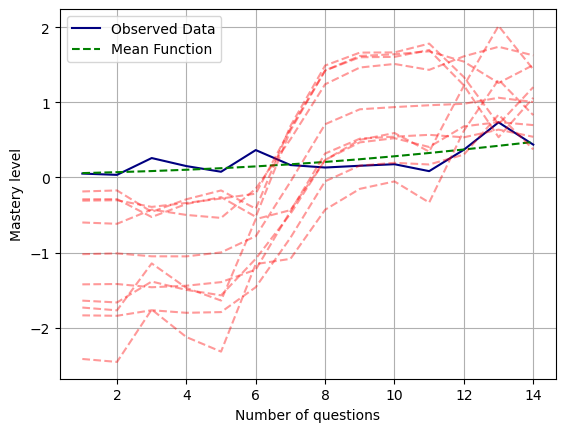

In [52]:

plt.plot(x,y,c='navy',label='Observed Data')
plt.plot(x,yModel,'g--',label='Mean Function')
for i in range(10):
    model=multivariateNormal(x,*popt)
    plt.plot(x,model,'r--',alpha=.4)
plt.legend();
plt.xlabel('Number of questions')
plt.ylabel('Mastery level');
plt.grid();

In [18]:
n=100
emptyArray=np.zeros((n,len(x)))
for i in range(n):
    emptyArray[i]= model

In [19]:
resultdf=pd.DataFrame(pd.DataFrame(emptyArray).T.stack()).reset_index()

<AxesSubplot:xlabel='level_0', ylabel='0'>

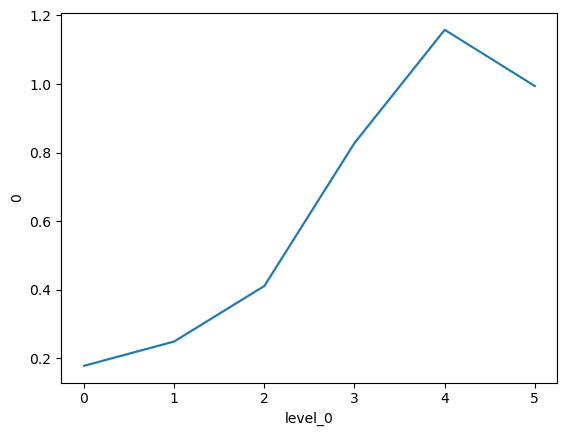

In [20]:
sns.lineplot(data=resultdf,x='level_0',y=0)

In [62]:
X=np.arange(10)

In [80]:
R=np.array([0,0,0,1,0,0,0,1,0,0])

In [85]:
y=1/(1+np.exp(3-X-R))

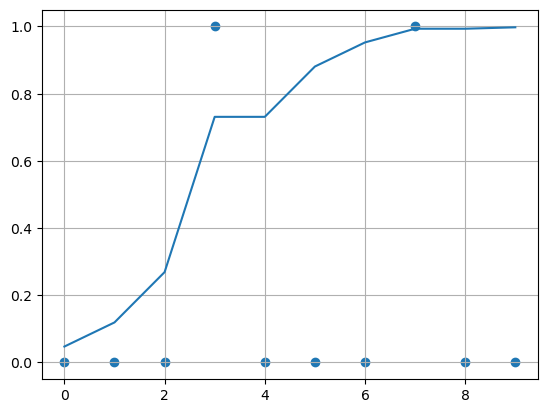

In [90]:
plt.plot(y)
plt.scatter(X,R)
plt.grid()